In [1]:
# 計算グラフの可視化

In [2]:
import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0+x1

x0.name="x0"
x1.name="x1"
y.name="y"
txt = get_dot_graph(y, verbose=False)
print(txt)

with open('dot/sample.dot', "w") as o:
    o.write(txt)

digraph g {
4597202848 [label="y", color=orange, style=filled]
4626832112 [label="Add", color=lightblue, style=filled, shape=box]
4626469312 -> 4626832112
4597178432 -> 4626832112
4626832112 -> 4597202848
4626469312 [label="x0", color=orange, style=filled]
4597178432 [label="x1", color=orange, style=filled]
}


In [3]:
from dezero.utils import plot_dot_graph

def goldstein(x,y):
    z = (1+(x+y+1)**2 * (19-14*x + 3*x**2 - 14*y + 6+x+y + 3*y**2)* (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 +48*y - 36*x*y +27*y**2)))
    return z

In [4]:
x = Variable(np.array(1))
y = Variable(np.array(1))

z = goldstein(x,y)

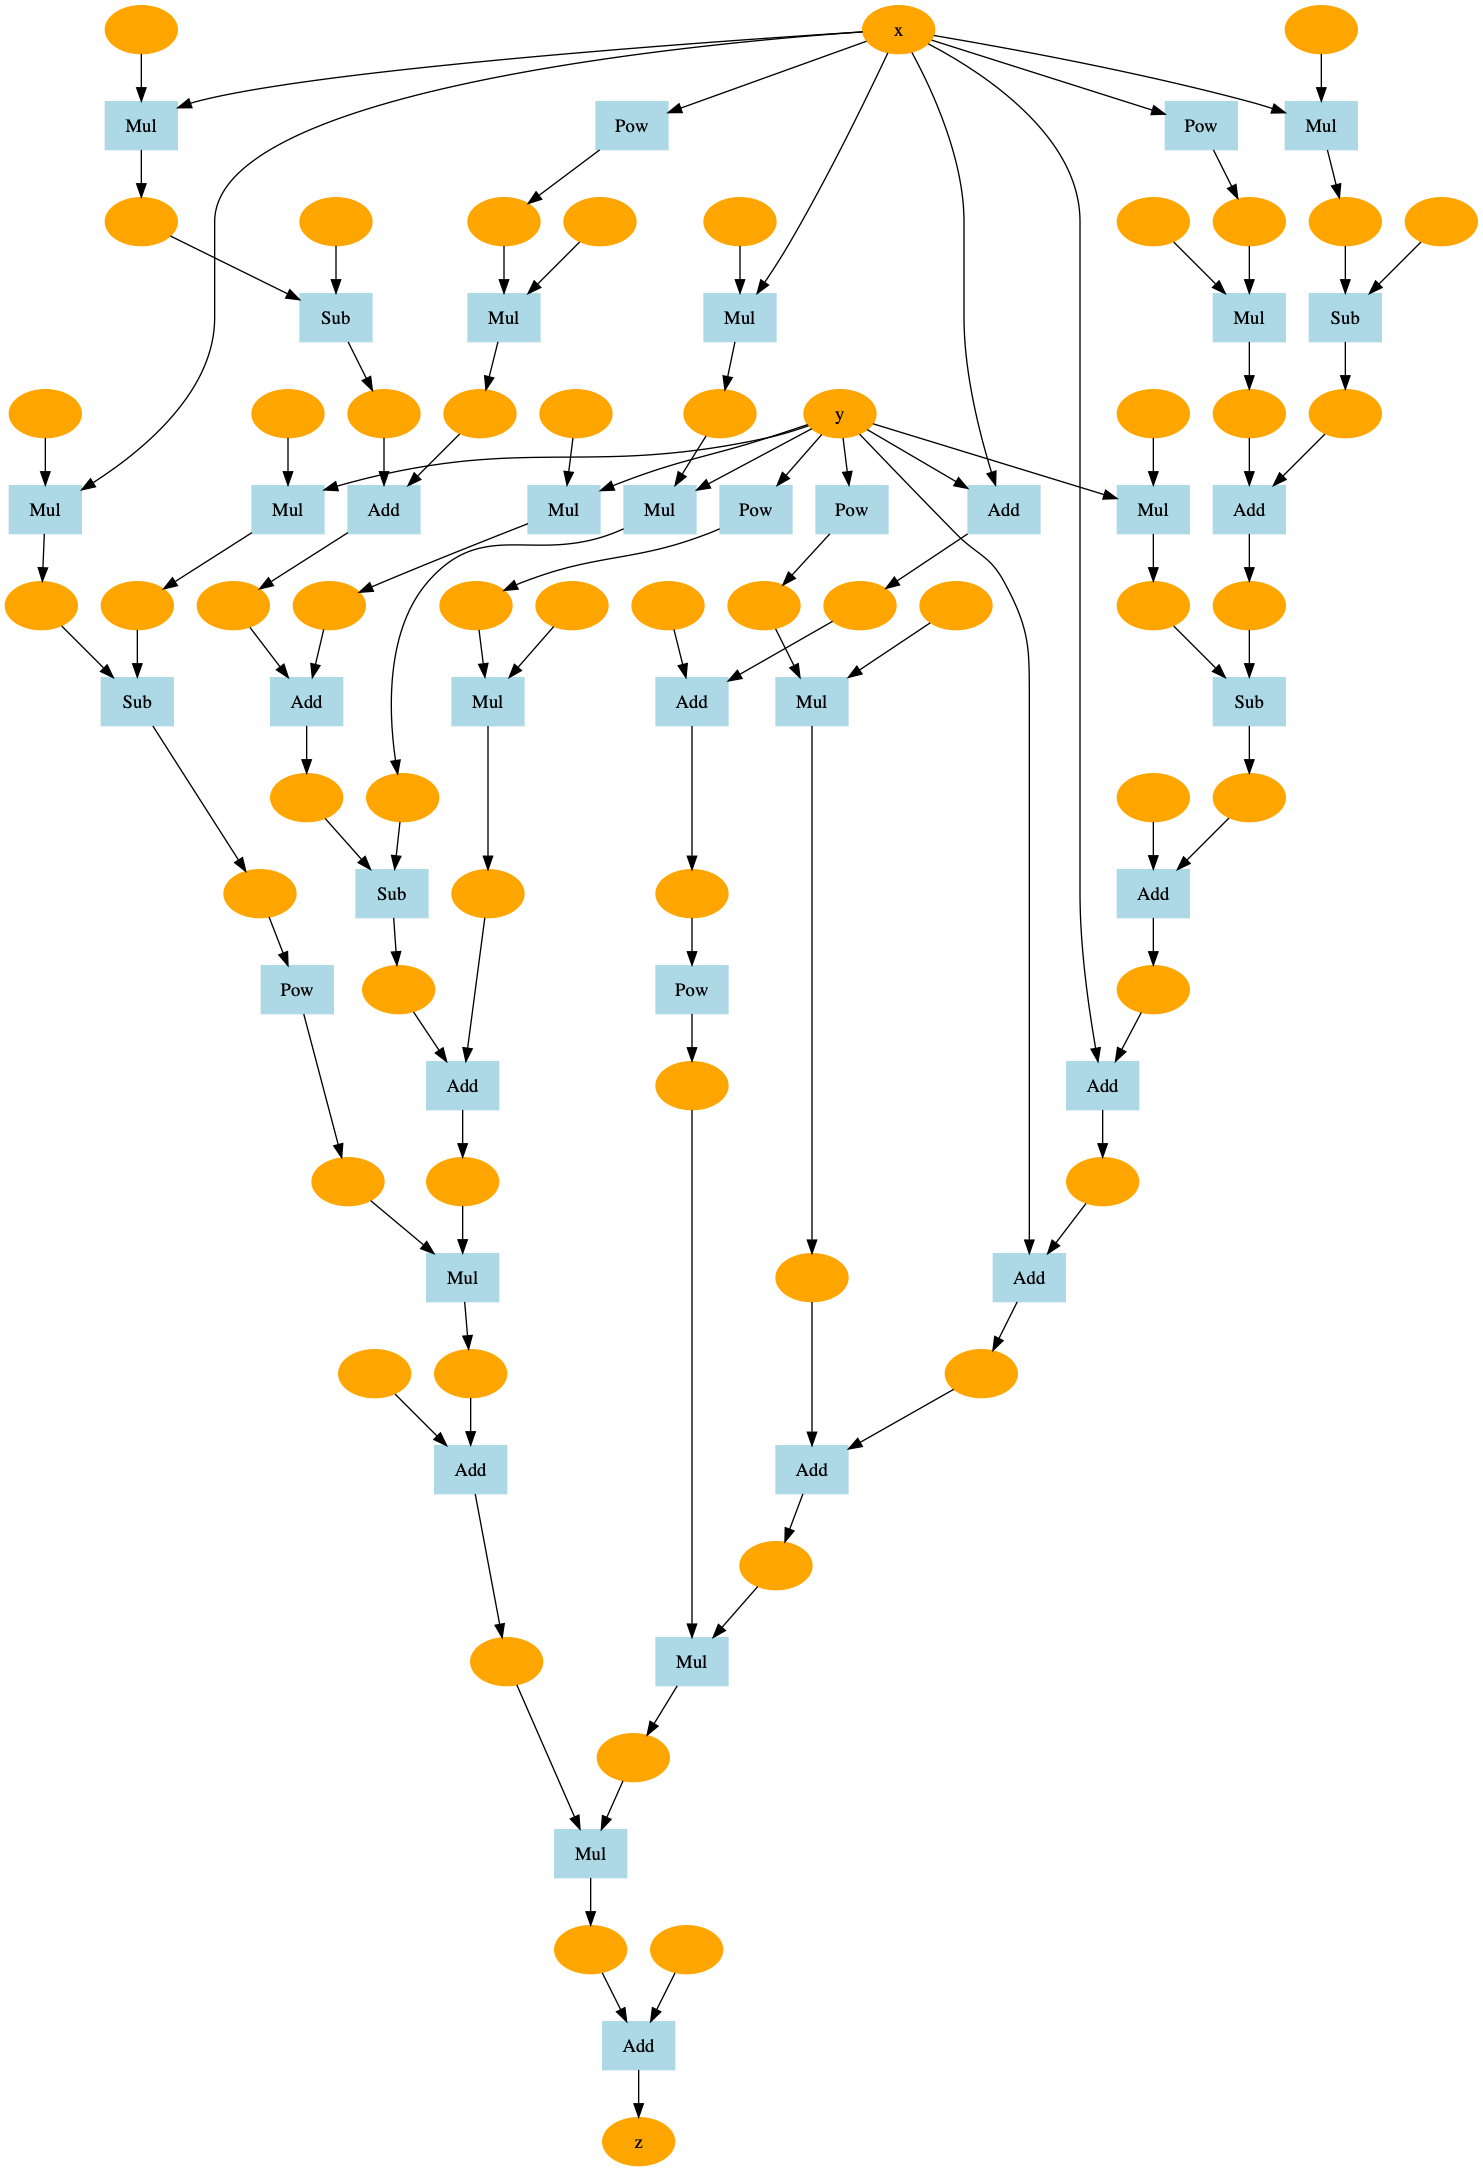

In [5]:
x.name="x"
y.name="y"
z.name="z"
plot_dot_graph(z, verbose=False, to_file="./dot/goldstein.png")

In [6]:
from  dezero import Function

class Sin(Function):
    def forward(self,x):
        y = np.sin(x)
        return y
    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy* np.cos(x)
        return gx
    
def sin(x):
    return Sin()(x)

In [7]:
x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()
y.data, x.grad

(array(0.70710678), variable(0.7071067811865476))

In [8]:
import math

def my_sin(x, threshold=1e-4):
    y=0
    for i in range(100000):
        c = (-1)**i/math.factorial(2*i+1)
        t = c*x**(2*i+1)
        y = y+t
        if abs(t.data) < threshold:
            break
    return y

In [9]:
x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

y.data, x.grad

(array(0.70710647), variable(0.7071032148228457))

In [10]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

(variable(-2.0), variable(400.0))

In [11]:
import dezero
if not dezero.is_simple_core:
    from dezero.core_simple import Variable
    from dezero.core_simple import setup_variable
    setup_variable()


def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 1000
print(x0, x1)
for i in range(iters):

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad
print(x0, x1)

variable(0.0) variable(2.0)
variable(0.6837118569138317) variable(0.4659526837427042)


In [12]:
#ニュートン法

In [13]:
def f(x):
    y = x**4 - 2* x**2
    return y

def gx2(x):
    return 12* x**2 -4

x = Variable(np.array(2.0))
iters = 10
for i in range(iters):
    print(i,x)
    y = f(x)
    x.cleargrad()
    y.backward()
    x.data -= x.grad/gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [19]:
import numpy as np
from dezero import Variable

def f(x):
    y = x**4 -2*x **2
    return y

x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad)
gx = x.grad
x.cleargrad()
gx.backward()
x.grad

variable(24.0)


variable(44.0)

In [21]:
iters = 10
for i in range(iters):
    print(i,x)
    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)
    
    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad
    x.data -= gx.data/gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [22]:
import numpy as np
from dezero.core import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    def backward(self, gy):
        x, = self.inputs
        gx = gy*cos(x)
        return gx
    
def sin(x):
    return Sin()(x)

In [24]:
class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y
    def backward(self, gy):
        x, = self.inputs
        gx = - gy * sin(x)
        return gx

def cos(x):
    return Cos()(x)

In [25]:
import dezero.functions as F
x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad)

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


In [26]:
class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
    
    def backward(self, gy):
        y = self.outputs[0]()
        gx = gy * (1-y*y)
        return gx
    
def tanh(x):
    return Tanh()(x)

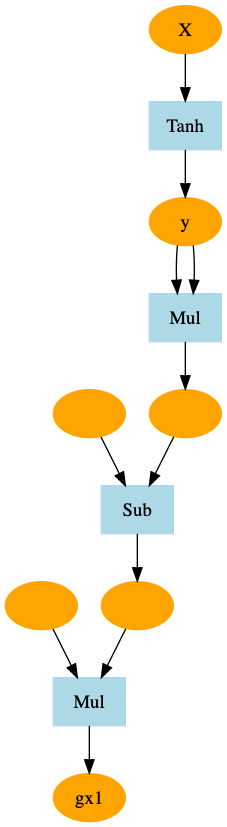

In [28]:
import numpy as np
from  dezero import Variable
import dezero.functions as F
from dezero.utils import plot_dot_graph

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name='X'
y.name="y"
y.backward(create_graph=True)
iters = 0

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    
gx = x.grad
gx.name="gx"+str(iters+1)
plot_dot_graph(gx, verbose=False, to_file="./dot/tanh.png")

In [29]:
import numpy as np
from dezero import Variable

x = Variable(np.array(2.0))
y = x**2
y.backward(create_graph=True)
gx = x.grad
x.cleargrad()
z = gx**3+y
z.backward()
x.grad

variable(100.0)

In [30]:
x = Variable(np.array([1,2]))
v = Variable(np.array([4,5]))

In [32]:
t = x**2
t

variable([1 4])

In [33]:
y = F.sum(t)
y

variable(5)

In [35]:
y.backward()
gx = x.grad
x.cleargrad()
gx

variable([4 8])

In [36]:
z = F.matmul(v,gx)
z.backward()
z.data, x.grad

(array(56), None)

In [39]:
gx

variable([4 8])

In [40]:
v

variable([4 5])

In [43]:
#matmul関数
sum(gx*v)

variable(56)